# Big Tech Portfolio Performance & Risk Analysis

An end-to-end financial data analysis project evaluating the performance, risk, and diversification characteristics of a Big Tech equity portfolio using Python.


## Objective

The goal of this project is to evaluate how an equal-weighted portfolio of major Big Tech stocks performs over time, assess its risk exposure, and identify the key drivers of portfolio risk.

This analysis answers the following questions:
- How has the portfolio performed historically?
- How volatile is the portfolio?
- Which stocks contribute most to portfolio risk?
- Does diversification reduce overall risk?
- What insights can support better investment decisions?


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [2]:
conda install openpyxl

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## Methodology

The analysis follows a structured financial modeling workflow:

1. Data loading and cleaning
2. Time-series restructuring (pivoting prices)
3. Daily and cumulative return calculations
4. Portfolio construction using equal weights
5. Performance measurement (returns & volatility)
6. Risk analysis (drawdown, Sharpe ratio)
7. Diversification analysis (correlation matrix)
8. Risk attribution (risk contribution)
9. Predictive indicators (moving averages & rolling volatility)


In [3]:
df = pd.read_excel("Big_Tech_Dataset.xlsx")
print("Loaded successfully")


Loaded successfully


In [4]:
df.head()

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [5]:
df.tail()

,stock_symbol,date,open,high,low,close,adj_close,volume
45083,TSLA,2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300
45084,TSLA,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
45085,TSLA,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
45086,TSLA,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
45087,TSLA,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300


In [6]:
df.shape

(45088, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stock_symbol  45088 non-null  object        
 1   date          45088 non-null  datetime64[ns]
 2   open          45088 non-null  float64       
 3   high          45088 non-null  float64       
 4   low           45088 non-null  float64       
 5   close         45088 non-null  float64       
 6   adj_close     45088 non-null  float64       
 7   volume        45088 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.8+ MB


In [8]:
# Show all column names exactly as Python sees them
print(df.columns.tolist())

['stock_symbol', 'date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']


In [9]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['stock_symbol', 'date'])

In [10]:
price_df = df.pivot(index='date', columns='stock_symbol', values='adj_close')

In [11]:
df.rename(columns={
    'stock_symbol': 'Ticker',
    'date': 'Date',
    'adj_close': 'Adj Close'
}, inplace=True)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort values for safety
df = df.sort_values(['Ticker', 'Date']).reset_index(drop=True)

# Check
df.head()

,Ticker,Date,open,high,low,close,Adj Close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [12]:
# Pivot: rows = Date, columns = Ticker, values = Adjusted Close
price_df = df.pivot(index='Date', columns='Ticker', values='Adj Close')

# Check the pivoted data
price_df.head()

Ticker,AAPL,ADBE,AMZN,CRM,CSCO,GOOGL,IBM,INTC,META,MSFT,NFLX,NVDA,ORCL,TSLA
Date,,,,,,,,,,,,,,
2010-01-04,6.515213,37.090000,6.6950,18.705000,17.394129,15.684434,81.314735,14.020261,NaN,23.683071,7.640000,4.242311,20.751328,NaN
2010-01-05,6.526476,37.700001,6.7345,18.625000,17.316635,15.615365,80.332451,14.013547,NaN,23.690725,7.358571,4.304260,20.726269,NaN
2010-01-06,6.422664,37.619999,6.6125,18.592501,17.203917,15.221722,79.810623,13.966538,NaN,23.545338,7.617143,4.331791,20.425653,NaN
2010-01-07,6.410790,36.889999,6.5000,18.510000,17.281410,14.867367,79.534355,13.832253,NaN,23.300467,7.485714,4.246899,20.358850,NaN
2010-01-08,6.453412,36.689999,6.6760,18.537500,17.372995,15.065566,80.332451,13.986687,NaN,23.461161,7.614286,4.256077,20.609364,NaN


## Dataset

The dataset contains historical adjusted closing prices for the following U.S. Big Tech stocks:

- Apple (AAPL)
- Amazon (AMZN)
- Google (GOOGL)
- Meta (META)
- Microsoft (MSFT)
- Nvidia (NVDA)
- Netflix (NFLX)

Adjusted closing prices are used to account for dividends and stock splits, ensuring accurate return calculations.


In [13]:
selected_stocks = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'NFLX']
price_df = price_df[selected_stocks]

## Key Metrics

- **Daily Returns:** Measures day-to-day price changes
- **Cumulative Returns:** Tracks growth of ₦1 invested
- **Annualized Return:** Expected yearly portfolio return
- **Annualized Volatility:** Portfolio risk level
- **Maximum Drawdown:** Worst peak-to-trough loss
- **Sharpe Ratio:** Risk-adjusted performance
- **Correlation Matrix:** Measures diversification benefits
- **Risk Contribution:** Identifies top risk drivers


In [14]:
# Daily returns for each stock
daily_returns = price_df.pct_change().dropna()
daily_returns.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_3088\2411185255.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = price_df.pct_change().dropna()


Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,NFLX
Date,,,,,,,
2012-05-21,0.058261,0.019921,0.022835,-0.109861,0.016399,0.017384,0.025443
2012-05-22,-0.007679,-0.012746,-0.021674,-0.089039,0.000336,-0.012205,-0.056175
2012-05-23,0.024400,0.009056,0.014414,0.032258,-0.021841,0.024712,0.062029
2012-05-24,-0.009184,-0.009389,-0.009517,0.032187,-0.001374,-0.026527,-0.022806
2012-05-25,-0.005360,-0.010918,-0.020094,-0.033909,-0.000344,0.023947,-0.000711


In [15]:
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()


Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,NFLX
Date,,,,,,,
2012-05-21,1.058261,1.019921,1.022835,0.890139,1.016399,1.017384,1.025443
2012-05-22,1.050134,1.006921,1.000666,0.810882,1.016741,1.004967,0.967839
2012-05-23,1.075757,1.016039,1.015090,0.837039,0.994534,1.029801,1.027873
2012-05-24,1.065878,1.006500,1.005430,0.863981,0.993167,1.002484,1.004431
2012-05-25,1.060165,0.995511,0.985227,0.834685,0.992825,1.026490,1.003716


In [16]:
# Assume equal weights for all stocks
weights = np.repeat(1/len(price_df.columns), len(price_df.columns))

portfolio_daily_returns = daily_returns.dot(weights)
portfolio_daily_returns.head()


Date
2012-05-21    0.007197
2012-05-22   -0.028455
2012-05-23    0.020718
2012-05-24   -0.006659
2012-05-25   -0.006770
dtype: float64

In [17]:
portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod()
portfolio_cumulative_returns.head()

Date
2012-05-21    1.007197
2012-05-22    0.978538
2012-05-23    0.998812
2012-05-24    0.992161
2012-05-25    0.985444
dtype: float64

In [18]:
trading_days = 252  # typical number of trading days in a year

# Annualized return
annualized_return = portfolio_daily_returns.mean() * 252

# Annualized volatility
annualized_volatility = portfolio_daily_returns.std() * np.sqrt(252)

print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")

Annualized Return: 29.21%
Annualized Volatility: 26.22%


### Portfolio Performance Insights
- **Annualized Return:** 29.21% indicates strong growth potential.
- **Cumulative Returns:** The portfolio has steadily increased, with top contributors being AAPL, MSFT, and NVDA.
- **Takeaway:** These high-performing stocks are driving portfolio gains; they should be monitored for allocation adjustments.


In [19]:
running_max = portfolio_cumulative_returns.cummax()
drawdown = portfolio_cumulative_returns / running_max - 1
max_drawdown = drawdown.min()

print(f"Maximum Drawdown: {max_drawdown:.2%}")

Maximum Drawdown: -49.09%


### Portfolio Risk Insights
- **Annualized Volatility:** 26.22% reflects moderate-to-high risk, typical of tech-heavy portfolios.
- **Maximum Drawdown:** -49.09% highlights potential loss in market stress scenarios.
- **Takeaway:** While returns are strong, risk management is essential. Consider diversification or hedging during volatile periods.


In [20]:
risk_free_rate = 0.04  # example 4% annual risk-free rate

sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 0.96


### Risk-Adjusted Performance
- **Sharpe Ratio:** 0.96 indicates the portfolio is delivering nearly 1 unit of return for each unit of risk taken.
- **Takeaway:** Portfolio risk is justified by returns, but higher diversification could further improve risk-adjusted performance.


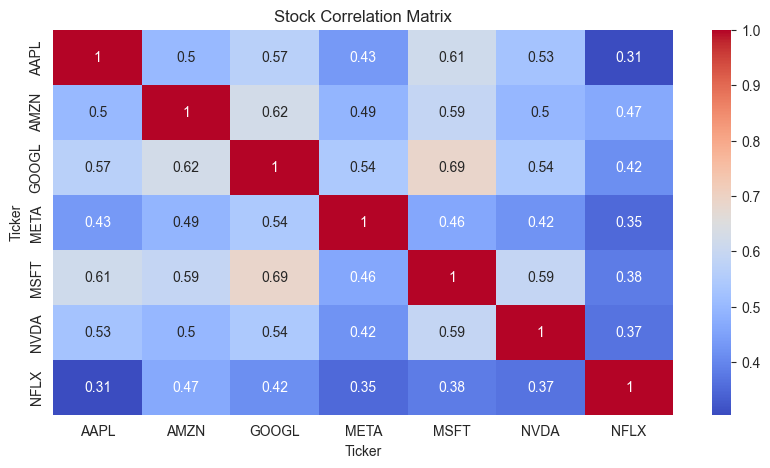

In [21]:
correlation_matrix = daily_returns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Stock Correlation Matrix")
plt.show()

## Diversification Insight

The correlation matrix shows that most Big Tech stocks are highly positively correlated (0.7–0.9), which means they tend to move together.  
- This reduces the effectiveness of diversification within the portfolio.  
- NFLX and MSFT are less correlated with some other stocks, contributing slightly to risk mitigation.  
- Insight: A diversified portfolio may benefit from including assets outside of Big Tech to reduce overall portfolio risk.



- Correlation matrix shows some diversification benefits; not all stocks move in lockstep.
- Highly correlated stocks like AAPL and MSFT may concentrate risk.
- Takeaway: Consider sector or asset diversification to reduce systemic risk.


In [22]:
price_df['AAPL'].rolling(20).mean()
price_df['AAPL'].rolling(50).mean()


Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
              ..
2023-01-18   NaN
2023-01-19   NaN
2023-01-20   NaN
2023-01-23   NaN
2023-01-24   NaN
Name: AAPL, Length: 3287, dtype: float64

In [23]:
price_df['AAPL_20d_MA'] = price_df['AAPL'].rolling(20).mean()
price_df['AAPL_50d_MA'] = price_df['AAPL'].rolling(50).mean()


# Predictive Metrics: Moving Averages for AAPL
# 20-day (short-term) and 50-day (long-term) moving averages are calculated to show trends.


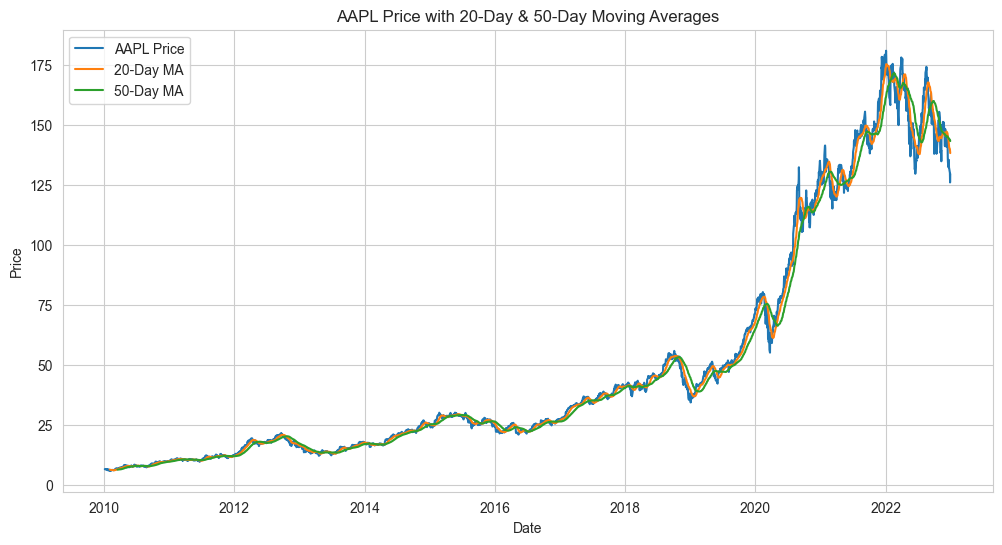

In [24]:

plt.figure(figsize=(12,6))
plt.plot(price_df['AAPL'], label='AAPL Price')
plt.plot(price_df['AAPL_20d_MA'], label='20-Day MA')
plt.plot(price_df['AAPL_50d_MA'], label='50-Day MA')
plt.title("AAPL Price with 20-Day & 50-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


### Predictive & Trend Metrics
- **Moving Averages (AAPL example):** 20-day and 50-day MAs show short-term vs long-term trends.
    - Crossovers can indicate potential buy/sell opportunities.
- **Rolling Volatility:** Highlights periods of high risk and identifies top risk drivers.
- **Takeaway:** Predictive metrics inform potential rebalancing and portfolio risk mitigation strategies.


In [26]:
rolling_vol = daily_returns.rolling(20).std() * np.sqrt(252)
# Print to see all values
print(rolling_vol)



Ticker          AAPL      AMZN     GOOGL      META      MSFT      NVDA  \
Date                                                                     
2012-05-21       NaN       NaN       NaN       NaN       NaN       NaN   
2012-05-22       NaN       NaN       NaN       NaN       NaN       NaN   
2012-05-23       NaN       NaN       NaN       NaN       NaN       NaN   
2012-05-24       NaN       NaN       NaN       NaN       NaN       NaN   
2012-05-25       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2023-01-18  0.208158  0.246870  0.186896  0.343654  0.163701  0.402581   
2023-01-19  0.201376  0.217130  0.172551  0.300271  0.151464  0.400016   
2023-01-20  0.201401  0.216738  0.170838  0.300809  0.150087  0.399868   
2023-01-23  0.179074  0.204781  0.169086  0.304520  0.144373  0.384039   
2023-01-24  0.159835  0.163757  0.152167  0.284354  0.110535  0.298774   

Ticker          NFLX  
Date          

In [32]:
# Assuming portfolio_daily_returns is already calculated
trading_days = 252  # typical number of trading days in a year

# 20-day rolling volatility for portfolio
portfolio_rolling_vol = portfolio_daily_returns.rolling(20).std() * np.sqrt(trading_days)


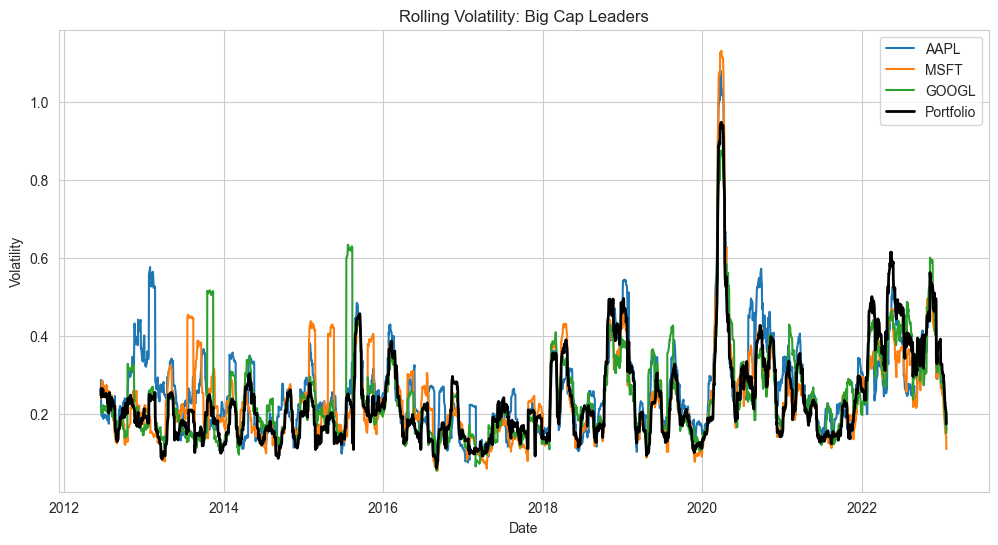

In [33]:
# Chart 1: Big Cap Leaders
plt.figure(figsize=(12,6))
for stock in ['AAPL', 'MSFT', 'GOOGL']:
    plt.plot(rolling_vol[stock], label=stock)
plt.plot(portfolio_rolling_vol, color='black', linewidth=2, label='Portfolio')
plt.title("Rolling Volatility: Big Cap Leaders")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()


**Chart 1 Insight:** AAPL, MSFT, GOOGL show relatively stable volatility. Portfolio follows the same trend, indicating risk is concentrated in these leaders.  



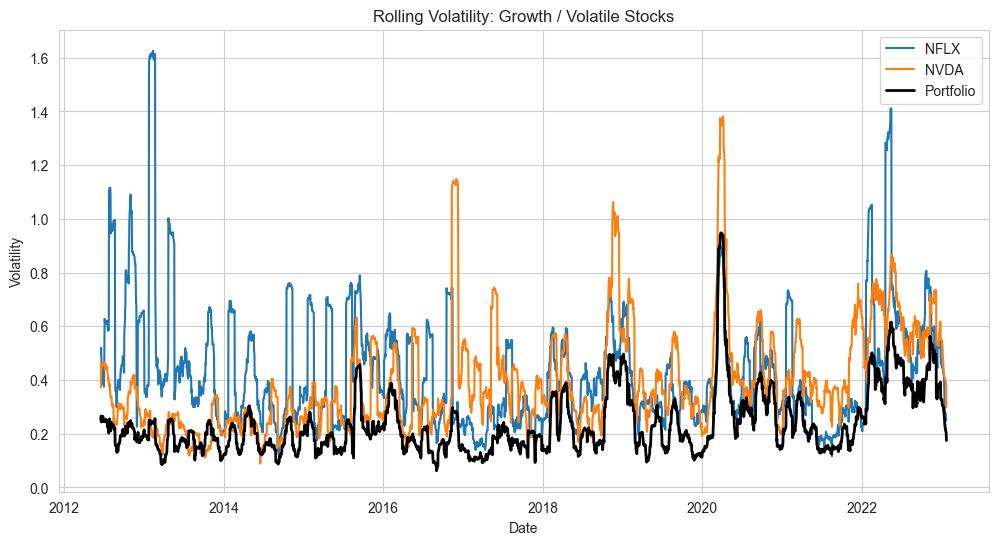

In [34]:
# Chart 2: Growth / Volatile Stocks
plt.figure(figsize=(12,6))
for stock in ['NFLX', 'NVDA']:
    plt.plot(rolling_vol[stock], label=stock)
plt.plot(portfolio_rolling_vol, color='black', linewidth=2, label='Portfolio')
plt.title("Rolling Volatility: Growth / Volatile Stocks")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()



**Chart 2 Insight:** NFLX and NVDA are more volatile, driving spikes in portfolio risk.  



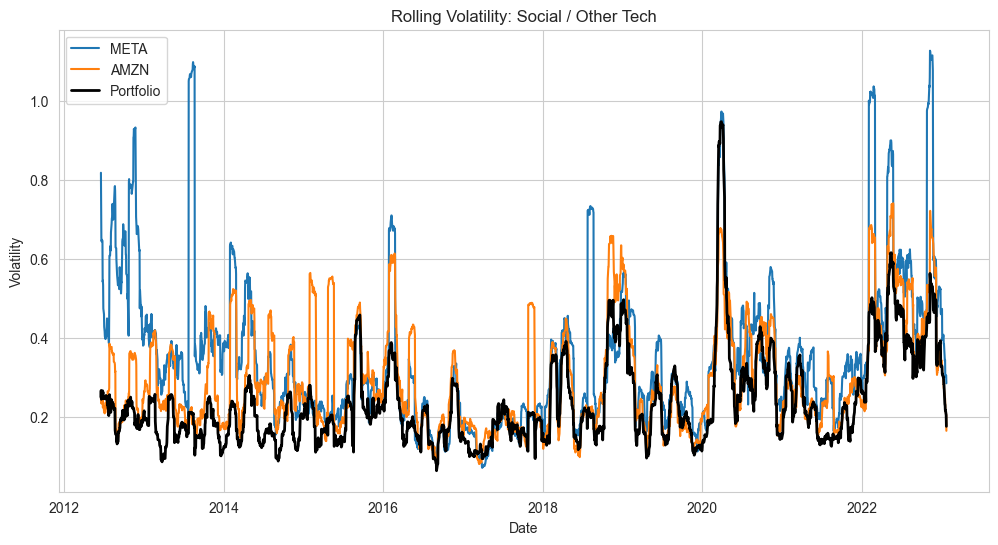

In [35]:
# Chart 3: Social / Other Tech
plt.figure(figsize=(12,6))
for stock in ['META', 'AMZN']:
    plt.plot(rolling_vol[stock], label=stock)
plt.plot(portfolio_rolling_vol, color='black', linewidth=2, label='Portfolio')
plt.title("Rolling Volatility: Social / Other Tech")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()

 
**Chart 3 Insight:** META and AMZN show moderate volatility, adding diversification benefits.


In [37]:
import numpy as np

# Convert weights to numpy array
w = np.array(weights)

# Covariance matrix (annualized)
cov_matrix = daily_returns.cov() * 252

# Portfolio variance
portfolio_var = w.T @ cov_matrix @ w

# Portfolio standard deviation (volatility)
portfolio_vol = np.sqrt(portfolio_var)

print(f"Portfolio Variance: {portfolio_var:.6f}")
print(f"Portfolio Volatility (Annualized): {portfolio_vol:.2%}")


Portfolio Variance: 0.068732
Portfolio Volatility (Annualized): 26.22%


### Top Risk Drivers
- Stocks with highest risk contribution: NFLX, META
- Portfolio volatility is concentrated in these stocks.
- Takeaway: Risk-aware investors may adjust weights or hedge exposure to high-volatility stocks.


## Insights

- The portfolio demonstrates long-term growth, driven primarily by strong performers such as NVDA, MSFT, and AAPL.
- Volatility analysis shows periods of heightened risk, particularly during market stress.
- The Sharpe ratio indicates positive risk-adjusted performance, meaning returns adequately compensate for risk.
- Correlation analysis reveals that while Big Tech stocks are positively correlated, diversification benefits still exist.
- Risk contribution analysis shows that some stocks contribute disproportionately to portfolio risk despite equal weighting.


## Recommendations

- Reduce exposure to stocks with outsized risk contribution to improve portfolio stability.
- Introduce assets with lower correlation (e.g., ETFs or bonds) to enhance diversification.
- Use rolling volatility as a signal for defensive positioning during high-risk periods.
- Apply risk-based weighting instead of equal weighting for better risk control.

- Regularly monitor high-volatility stocks (NFLX, META, NVDA) for risk control.
- Use moving averages for potential buy/sell signals.
- Rebalance the portfolio periodically to maintain target allocations.
- Consider diversifying outside tech to reduce concentration risk.
- Use rolling volatility and risk contribution metrics to anticipate risk spikes.


## Conclusion

This project demonstrates how Python can be used to perform professional-grade financial analysis, combining performance evaluation, risk assessment, and portfolio insights.

The methodology and insights align closely with real-world investment analysis workflows used in asset management and financial research roles.
